In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.options.display.float_format = '{:.2f}'.format 

In [46]:
df_prod = pd.read_csv("./raw_data/production-quantity_raw.csv")
df_prod.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1961,1961,ha,350000.0,A,Official figure,NaN
1,QCL,Crops and livestock products,24,Angola,5510,Production,1610,"Coffee, green",1961,1961,t,168600.0,A,Official figure,NaN
2,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1962,1962,ha,500000.0,A,Official figure,NaN
3,QCL,Crops and livestock products,24,Angola,5510,Production,1610,"Coffee, green",1962,1962,t,185000.0,A,Official figure,NaN
4,QCL,Crops and livestock products,24,Angola,5312,Area harvested,1610,"Coffee, green",1963,1963,ha,500000.0,E,Estimated value,NaN


##### first data understandings - (PRODUCTION QUANTITY & AREA HARVESTED)

In [47]:
df_prod.shape

(10556, 15)

In [48]:
df_prod.dtypes

Domain Code          object
Domain               object
Area Code (M49)       int64
Area                 object
Element Code          int64
Element              object
Item Code (CPC)       int64
Item                 object
Year Code             int64
Year                  int64
Unit                 object
Value               float64
Flag                 object
Flag Description     object
Note                 object
dtype: object

In [49]:
df_prod.describe()

,Area Code (M49),Element Code,Item Code (CPC),Year Code,Year,Value
count,10556.000000,10556.000000,10556.0,10556.000000,10556.000000,1.018800e+04
mean,426.635468,5411.318871,1610.0,1991.807408,1991.807408,1.039288e+05
std,245.768005,99.004176,0.0,18.137591,18.137591,2.984428e+05
min,24.000000,5312.000000,1610.0,1961.000000,1961.000000,0.000000e+00
25%,192.000000,5312.000000,1610.0,1976.000000,1976.000000,5.400000e+02
50%,404.000000,5510.000000,1610.0,1992.000000,1992.000000,1.000000e+04
75%,630.000000,5510.000000,1610.0,2007.000000,2007.000000,7.804375e+04
max,894.000000,5510.000000,1610.0,2023.000000,2023.000000,4.462657e+06


In [50]:
#Columns to keep: Area Code (M49), Area, Element (make own columns for each element), Year, Unit, Value
df_prod = df_prod.drop(['Domain Code', 'Domain', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1)

In [51]:
df_prod.head()

,Area Code (M49),Area,Element,Item,Year,Unit,Value
0,24,Angola,Area harvested,"Coffee, green",1961,ha,350000.0
1,24,Angola,Production,"Coffee, green",1961,t,168600.0
2,24,Angola,Area harvested,"Coffee, green",1962,ha,500000.0
3,24,Angola,Production,"Coffee, green",1962,t,185000.0
4,24,Angola,Area harvested,"Coffee, green",1963,ha,500000.0


In [52]:
df_prod = df_prod.pivot_table(
    index=['Area Code (M49)', 'Area', 'Year'],
    columns='Element',
    values='Value'
).reset_index() 

In [60]:
df_prod = df_prod.rename(columns={"Area Code (M49)":"Area_code", "Area harvested":"Area_harvested_hectar", "Production":"Production_quantity_tonnes"})

In [61]:
df_prod.head()

Element,Area_code,Area,Year,Area_harvested_hectar,Production_quantity_tonnes
0,24,Angola,1961,350000.0,168600.0
1,24,Angola,1962,500000.0,185000.0
2,24,Angola,1963,500000.0,168300.0
3,24,Angola,1964,500000.0,198200.0
4,24,Angola,1965,500000.0,205000.0


In [128]:
xx = df_prod.groupby("Area")[["Production_quantity_tonnes", "Area_harvested_hectar"]].mean().sort_values(by=["Area_harvested_hectar", "Production_quantity_tonnes"]).head(8)

In [129]:
xx.head()

Element,Production_quantity_tonnes,Area_harvested_hectar
Area,,
Mauritius,4.06,0.31
Tonga,9.50,5.86
Saint Lucia,20.59,20.69
Cook Islands,4.45,22.13
Belize,110.97,59.46


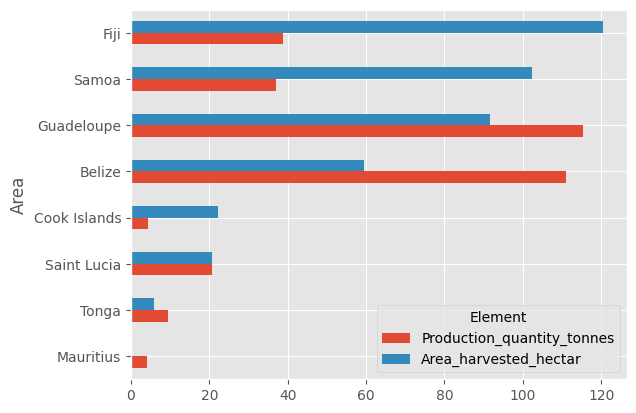

In [130]:
xx.plot(kind="barh")
plt.show()